# PROJECT TITLE : TRAIN ACCIDENT 
# GROUP NO. 8
# SECTION : 7CSE06

# GROUP MEMBERS-

# M.Mounica - 20181CSE0401

# Kummetha Geethika Reddy -20181CSE0361

# Mansi Pandey - 20181CSE0403

# Kolla Vennela- 20181CSE0336

# Kunchapu Shalini - 20181CSE0364

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# IMPORTING THE LIBRARIES

In [ ]:
!pip install pywaffle

     |████████████████████████████████| 526 kB 5.2 MB/s 


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# LOADING THE DATA

In [ ]:
from google.colab import files
uploaded=files.upload()

Saving train (1).csv to train (1).csv


In [ ]:
df=pd.read_csv("/content/train (1).csv")

# TOP 5 ROWS

In [ ]:
df.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# SHAPE OF THE DATA

In [ ]:
df.shape

(891, 12)

# DATA INFO

In [ ]:
df.info

<bound method DataFrame.info of      PassengerId  Survived  Pclass  ...     Fare Cabin  Embarked
0              1         0       3  ...   7.2500   NaN         S
1              2         1       1  ...  71.2833   C85         C
2              3         1       3  ...   7.9250   NaN         S
3              4         1       1  ...  53.1000  C123         S
4              5         0       3  ...   8.0500   NaN         S
..           ...       ...     ...  ...      ...   ...       ...
886          887         0       2  ...  13.0000   NaN         S
887          888         1       1  ...  30.0000   B42         S
888          889         0       3  ...  23.4500   NaN         S
889          890         1       1  ...  30.0000  C148         C
890          891         0       3  ...   7.7500   NaN         Q

[891 rows x 12 columns]>

# DATA DESCRIPTION

In [ ]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


# IF THERE IS ANY NULL VALUE IN THE COLUMN

In [ ]:
df.isnull()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


In [ ]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

# We can use seaborn to create a simple heatmap to see where we are missing data!

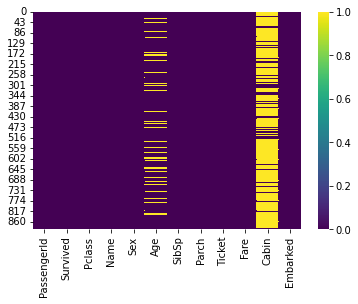

In [ ]:
sns.heatmap(df.isnull(),cmap='viridis')

In [ ]:
df['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

# 200 less count in survived compared to not survived

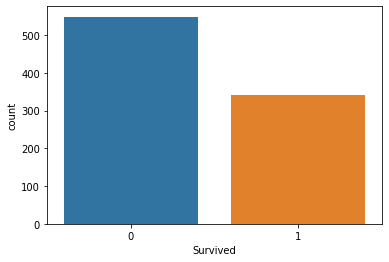

In [ ]:
sns.countplot(x='Survived',data=df)

In [ ]:
df.Sex.value_counts()

male      577
female    314
Name: Sex, dtype: int64

# How many Males and Females were Survived?



In [ ]:
df.groupby('Sex')['Survived'].value_counts()

Sex     Survived
female  1           233
        0            81
male    0           468
        1           109
Name: Survived, dtype: int64

In [ ]:
df.groupby('Survived')['Sex'].value_counts()

Survived  Sex   
0         male      468
          female     81
1         female    233
          male      109
Name: Sex, dtype: int64

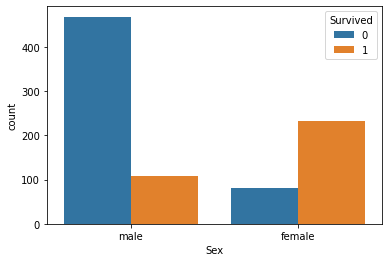

In [ ]:
sns.countplot(x='Sex',hue='Survived',data=df)

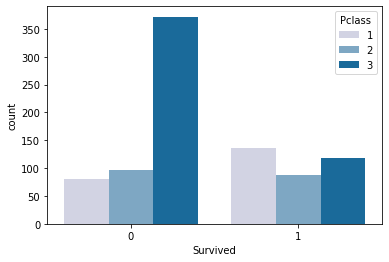

In [ ]:
#no of people survived and not survived in various classes
sns.countplot(x='Survived',hue='Pclass',data=df,palette='PuBu') 

# Pclass vs Fare

In [ ]:
df.groupby('Pclass')['Fare'].mean()

Pclass
1    84.154687
2    20.662183
3    13.675550
Name: Fare, dtype: float64

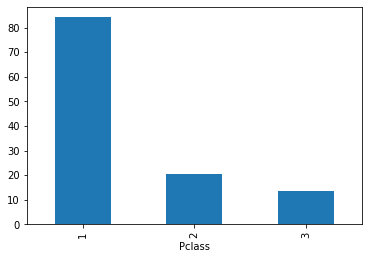

In [ ]:
df.groupby('Pclass')['Fare'].mean().plot(kind='bar')

# histogram of age


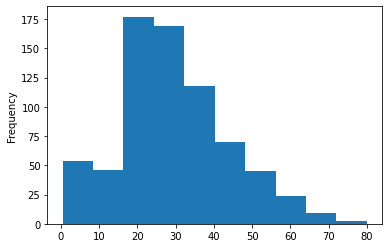

In [ ]:
df['Age'].plot.hist()

In [ ]:
df.groupby('Pclass')['Fare'].mean().reset_index()

,Pclass,Fare
0,1,84.154687
1,2,20.662183
2,3,13.675550


In [ ]:
d=df.groupby('Pclass')['Fare'].mean().reset_index()

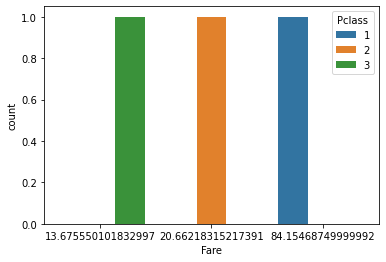

In [ ]:
sns.countplot(x='Fare',hue='Pclass',data=d)

# How many People Were travelling Alone? And what's thier Survival Rate?

In [ ]:
df[(df['SibSp']==0) & (df['Parch']==0)].shape[0]

537

In [ ]:
df[(df['SibSp']==0) & (df['Parch']==0)]['Survived'].value_counts(normalize=True)

0    0.696462
1    0.303538
Name: Survived, dtype: float64

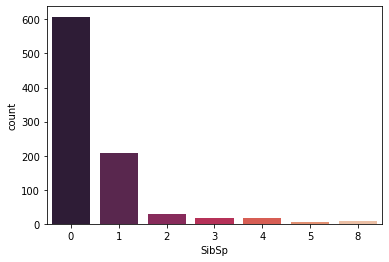

In [ ]:
#depicting siblings
sns.countplot(x='SibSp',data=df,palette='rocket')

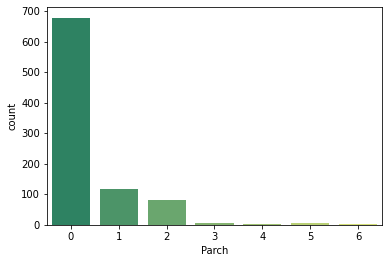

In [ ]:
#of parents or children
sns.countplot(x='Parch',data=df,palette='summer')

# Sex count representation in pie

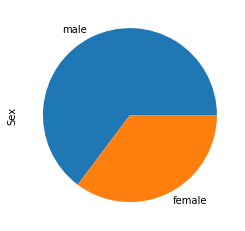

In [ ]:
df.Sex.value_counts().plot(kind='pie')

# Scatter plot with the fare payed and the age

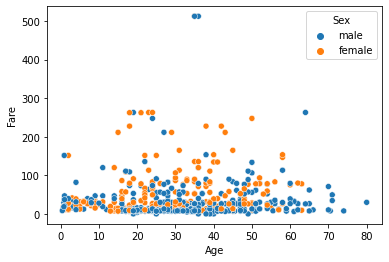

In [ ]:
sns.scatterplot(x='Age',y='Fare',hue='Sex',data=df)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


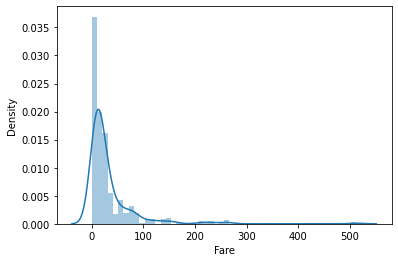

In [ ]:
sns.distplot(df.Fare)

# we observe that older age group are travelling more in class1 and 2 compared to 3

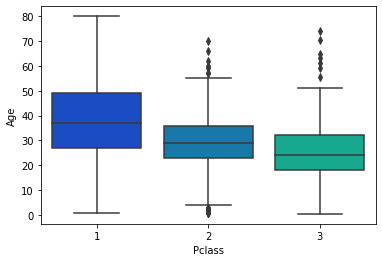

In [ ]:
sns.boxplot(x='Pclass',y='Age',data=df,palette='winter')

# fare comparision by passangers

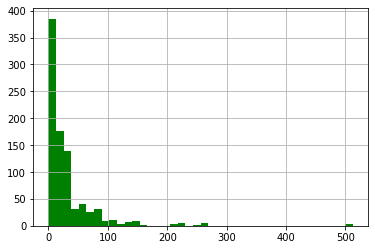

In [ ]:
df['Fare'].hist(color='green',bins=40)

# people having siblings r spouse on board

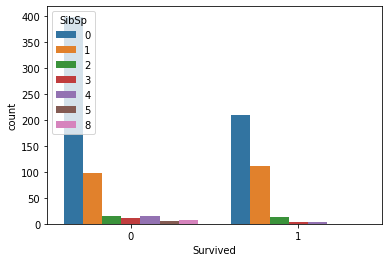

In [ ]:
sns.countplot(x='Survived',hue='SibSp',data=df)